In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
!pip install kaggle


In [5]:
from google.colab import files
files.upload()  # choose kaggle.json


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"physictricty","key":"e99545f4dae0242ddd6e188fb852a0ee"}'}

In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json



In [7]:
!kaggle datasets download -d snehaanbhawal/resume-dataset
!unzip resume-dataset.zip


Dataset URL: https://www.kaggle.com/datasets/snehaanbhawal/resume-dataset
License(s): CC0-1.0
  0% 0.00/62.5M [00:00<?, ?B/s]
100% 62.5M/62.5M [00:00<00:00, 932MB/s]
Archive:  resume-dataset.zip
  inflating: Resume/Resume.csv       
  inflating: data/data/ACCOUNTANT/10554236.pdf  
  inflating: data/data/ACCOUNTANT/10674770.pdf  
  inflating: data/data/ACCOUNTANT/11163645.pdf  
  inflating: data/data/ACCOUNTANT/11759079.pdf  
  inflating: data/data/ACCOUNTANT/12065211.pdf  
  inflating: data/data/ACCOUNTANT/12202337.pdf  
  inflating: data/data/ACCOUNTANT/12338274.pdf  
  inflating: data/data/ACCOUNTANT/12442909.pdf  
  inflating: data/data/ACCOUNTANT/12780508.pdf  
  inflating: data/data/ACCOUNTANT/12802330.pdf  
  inflating: data/data/ACCOUNTANT/13072019.pdf  
  inflating: data/data/ACCOUNTANT/13130984.pdf  
  inflating: data/data/ACCOUNTANT/13294301.pdf  
  inflating: data/data/ACCOUNTANT/13491889.pdf  
  inflating: data/data/ACCOUNTANT/13701259.pdf  
  inflating: data/data/ACCOUNTAN

In [9]:
!ls


data  kaggle.json  Resume  resume-dataset.zip  sample_data


In [10]:
!ls Resume


Resume.csv


In [11]:
import pandas as pd
df = pd.read_csv("Resume/Resume.csv")
df.head()


,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [12]:
df.shape
df.head()
df['Category'].value_counts()


,count
Category,
INFORMATION-TECHNOLOGY,120
BUSINESS-DEVELOPMENT,120
ADVOCATE,118
CHEF,118
ENGINEERING,118
ACCOUNTANT,118
FINANCE,118
FITNESS,117
AVIATION,117


In [14]:
df.columns



Index(['ID', 'Resume_str', 'Resume_html', 'Category'], dtype='object')

In [15]:
df['cleaned'] = df['Resume_str'].apply(clean_text)


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned']).toarray()
y = df['Category']


In [17]:
df[['Resume_str', 'Category']].head()


,Resume_str,Category
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR
1,"HR SPECIALIST, US HR OPERATIONS ...",HR
2,HR DIRECTOR Summary Over 2...,HR
3,HR SPECIALIST Summary Dedica...,HR
4,HR MANAGER Skill Highlights ...,HR


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [20]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


                        precision    recall  f1-score   support

            ACCOUNTANT       0.67      0.83      0.74        24
              ADVOCATE       0.35      0.54      0.43        24
           AGRICULTURE       1.00      0.46      0.63        13
               APPAREL       0.67      0.21      0.32        19
                  ARTS       0.50      0.29      0.36        21
            AUTOMOBILE       0.00      0.00      0.00         7
              AVIATION       0.82      0.75      0.78        24
               BANKING       0.84      0.70      0.76        23
                   BPO       0.00      0.00      0.00         4
  BUSINESS-DEVELOPMENT       0.46      0.79      0.58        24
                  CHEF       0.81      0.71      0.76        24
          CONSTRUCTION       0.82      0.82      0.82        22
            CONSULTANT       0.44      0.17      0.25        23
              DESIGNER       0.84      0.76      0.80        21
         DIGITAL-MEDIA       0.71      

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


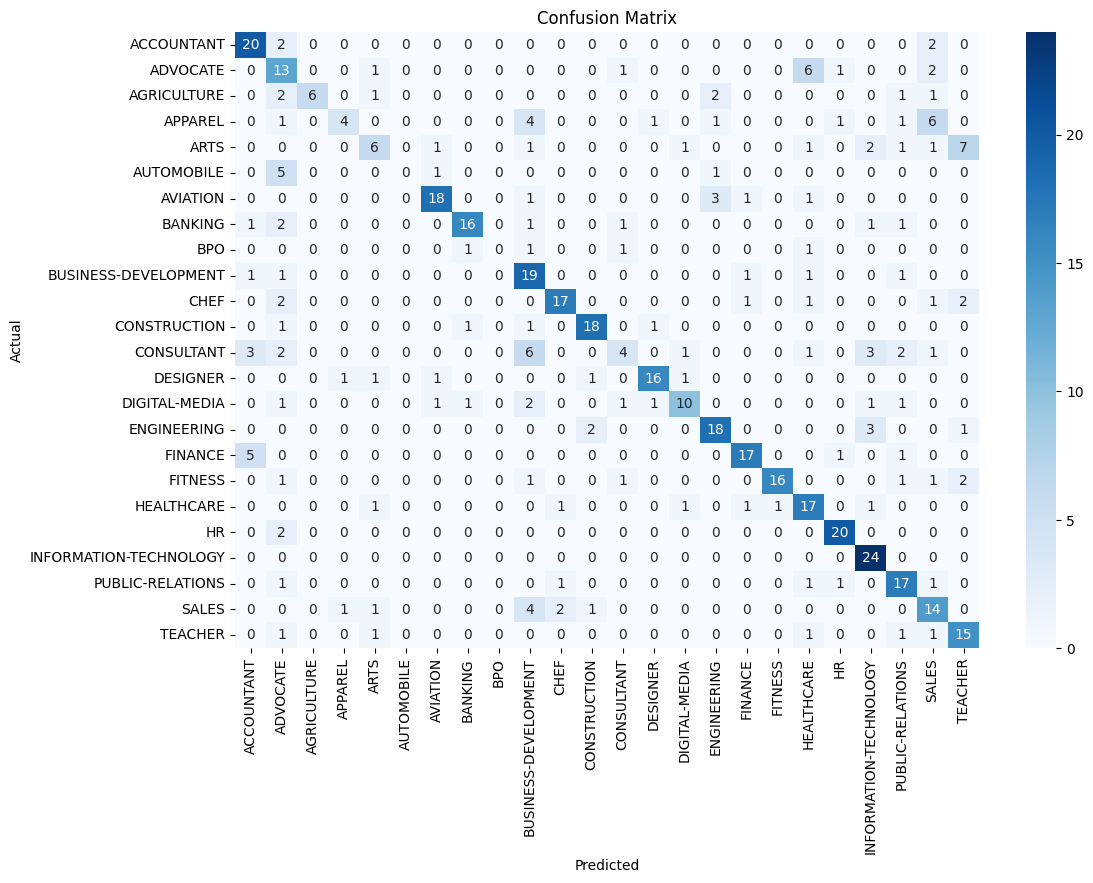

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
plt.figure(figsize=(12,8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=model.classes_, yticklabels=model.classes_, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [23]:
import joblib
joblib.dump(model, "resume_model.pkl")
joblib.dump(vectorizer, "tfidf.pkl")


['tfidf.pkl']